# HR Analytics Project



>Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

>Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

>Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

>How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

Attrition affecting Companies

>A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("HR_Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Summry statistics

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Analysis

In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


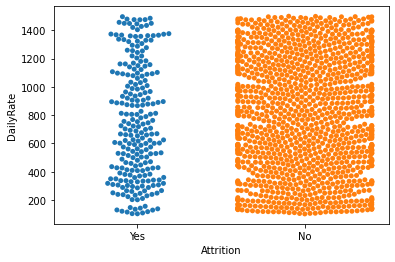

In [9]:
sns.swarmplot(df["Attrition"],df["DailyRate"])

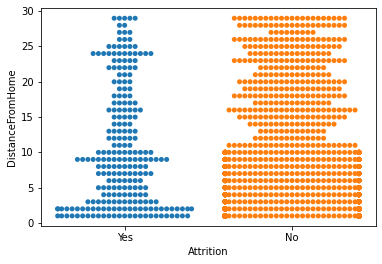

In [10]:
sns.swarmplot(df["Attrition"],df["DistanceFromHome"])

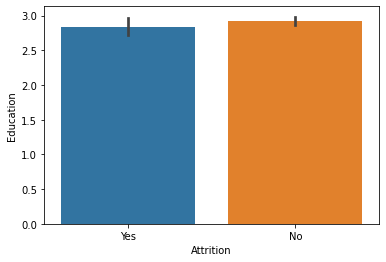

In [11]:
sns.barplot(df["Attrition"],df["Education"])

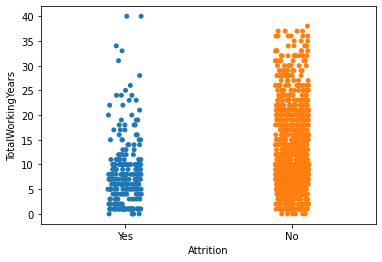

In [12]:
sns.stripplot(df["Attrition"],df["TotalWorkingYears"])

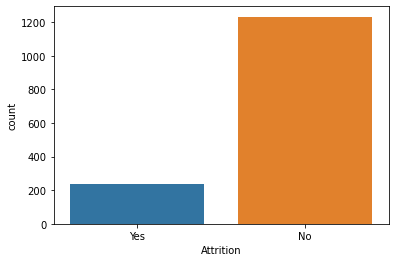

In [13]:
sns.countplot(df["Attrition"])

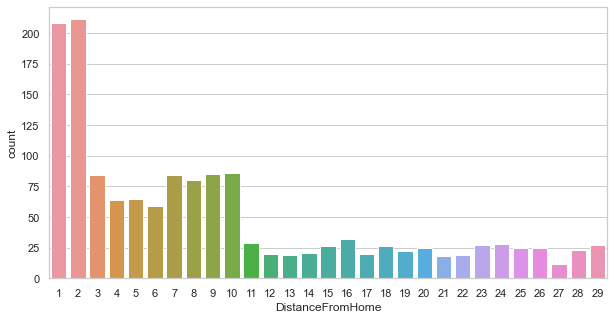

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df["DistanceFromHome"])

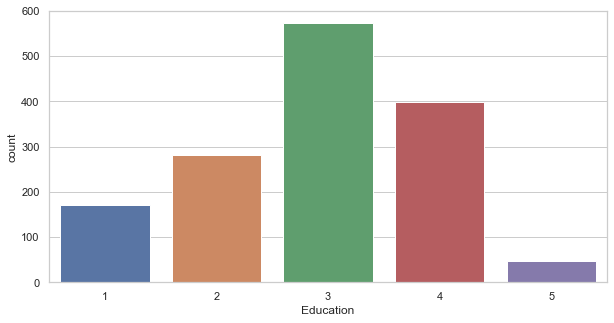

In [15]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.countplot(df["Education"])

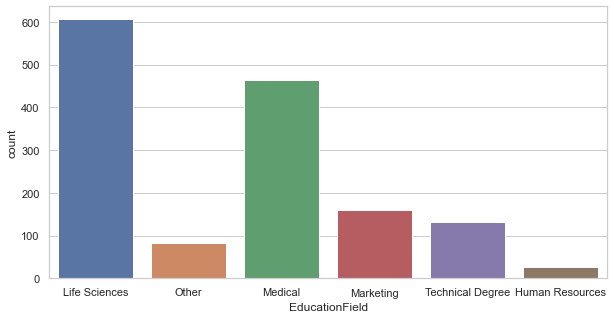

In [16]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.countplot(df["EducationField"])

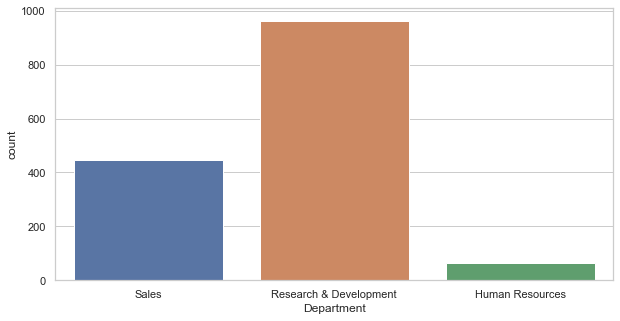

In [17]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.countplot(df["Department"])

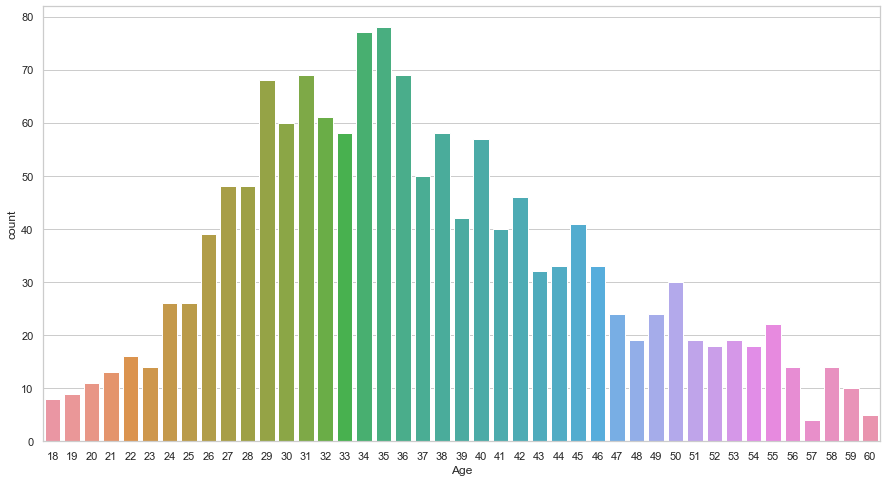

In [18]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.countplot(df["Age"])

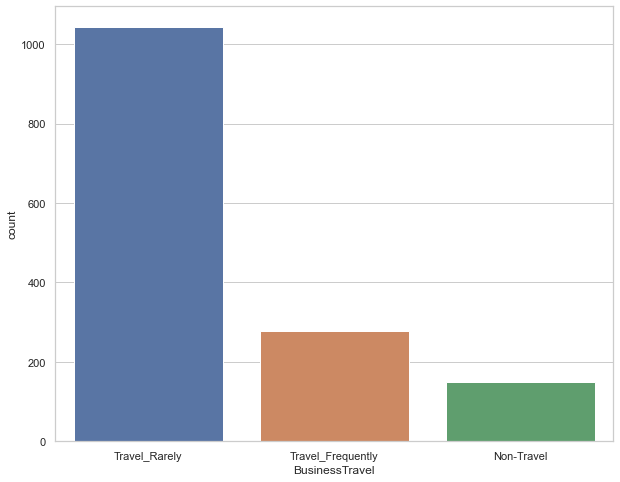

In [19]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.countplot(df["BusinessTravel"])

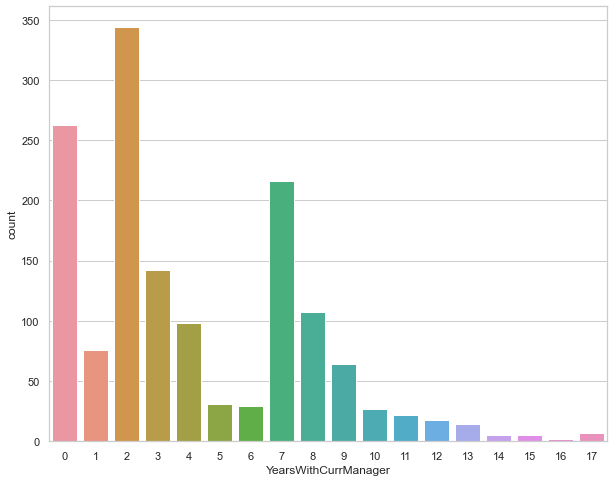

In [20]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.countplot(df["YearsWithCurrManager"])

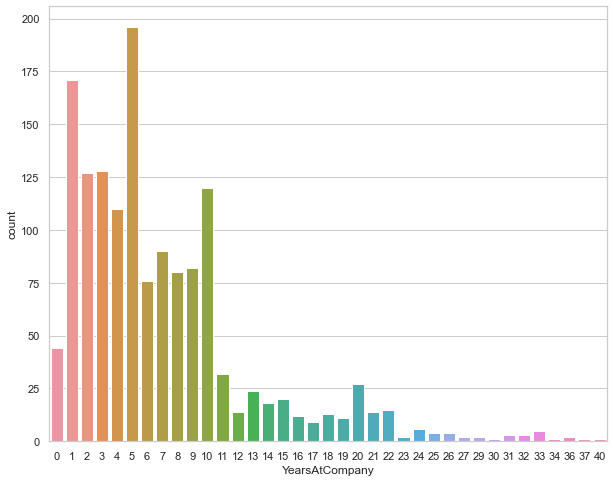

In [21]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.countplot(df["YearsAtCompany"])

Age                            AxesSubplot(0.125,0.657941;0.0731132x0.222059)
DailyRate                   AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
DistanceFromHome            AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Education                   AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
EmployeeCount               AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
EmployeeNumber              AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
EnvironmentSatisfaction     AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
HourlyRate                  AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
JobInvolvement              AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
JobLevel                       AxesSubplot(0.125,0.391471;0.0731132x0.222059)
JobSatisfaction             AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
MonthlyIncome               AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
MonthlyRate                 AxesSubplot(0.388208,0.391471;0.0731

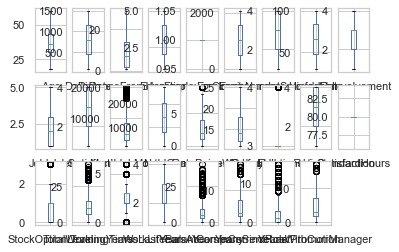

In [22]:
#checking outliers
df.plot(kind="box",subplots=True,layout=(3,9))

In [23]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [24]:
col=["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime",]

In [25]:
#changing col in numetic value
for i in col:
    df[i]=pd.factorize(df[i])[0]

In [26]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [27]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,3,2,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [28]:
print(df["StandardHours"].value_counts())
print(df["EmployeeCount"].value_counts())


80    1470
Name: StandardHours, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64


In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [30]:
df.iloc[:,0:10]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber
0,41,0,0,1102,0,1,2,0,1,1
1,49,1,1,279,1,8,1,0,1,2
2,37,0,0,1373,1,2,2,1,1,4
3,33,1,1,1392,1,3,4,0,1,5
4,27,1,0,591,1,2,1,2,1,7
...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,1,2061
1466,39,1,0,613,1,6,1,2,1,2062
1467,27,1,0,155,1,4,3,0,1,2064
1468,49,1,1,1023,0,2,3,2,1,2065


In [31]:
df.iloc[:,10:20]

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,2,0,94,3,2,0,4,0,5993,19479
1,3,1,61,2,2,1,2,1,5130,24907
2,4,1,92,2,1,2,3,0,2090,2396
3,4,0,56,3,1,1,3,1,2909,23159
4,1,1,40,3,1,2,2,1,3468,16632
...,...,...,...,...,...,...,...,...,...,...
1465,3,1,41,4,2,2,4,1,2571,12290
1466,4,1,42,2,3,4,1,1,9991,21457
1467,2,1,87,4,2,3,2,1,6142,5174
1468,4,1,63,2,2,0,2,1,5390,13243


In [32]:
df.iloc[:,20:36]

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,0,0,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,1,23,4,4,80,1,10,3,3,10,7,1,7
2,6,0,0,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,0,11,3,3,80,0,8,3,3,8,7,3,0
4,9,0,1,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,4,0,1,17,3,3,80,1,17,3,3,5,2,0,3
1466,4,0,1,15,3,1,80,1,9,5,3,7,7,1,7
1467,1,0,0,20,4,2,80,1,6,0,3,6,2,0,3
1468,2,0,1,14,3,4,80,0,17,3,2,9,6,0,8


In [33]:
print(df["Over18"].value_counts()) #one atrib
print(df["EmployeeNumber"].value_counts())
print(df["EmployeeCount"].value_counts())
print(df["StandardHours"].value_counts())

0    1470
Name: Over18, dtype: int64
2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64
1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


In [34]:
#droping columns over18,emplyeenumber,employeecount,standardhours 
df.drop(["Over18","EmployeeNumber","EmployeeCount","StandardHours"],axis=1,inplace=True)

In [35]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,1,2,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,3,0,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,3,2,4,1,...,3,4,0,17,3,2,9,6,0,8


In [36]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [37]:
#drop outliers
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1387, 31)

In [38]:
#checking skewness
df_new.skew()

Age                         0.472280
Attrition                  -1.805983
BusinessTravel              1.426774
DailyRate                  -0.017078
Department                 -0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.484586
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                     0.869228
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                   -0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [39]:
for c in df_new.columns:
    if df_new.skew().loc[c]>0.55:
        df_new[c]=np.log1p(df_new[c])

In [40]:
df_new.skew()

Age                         0.472280
Attrition                  -1.805983
BusinessTravel              1.156227
DailyRate                  -0.017078
Department                 -0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField              0.484586
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobRole                    -0.071450
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                   -0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
Y

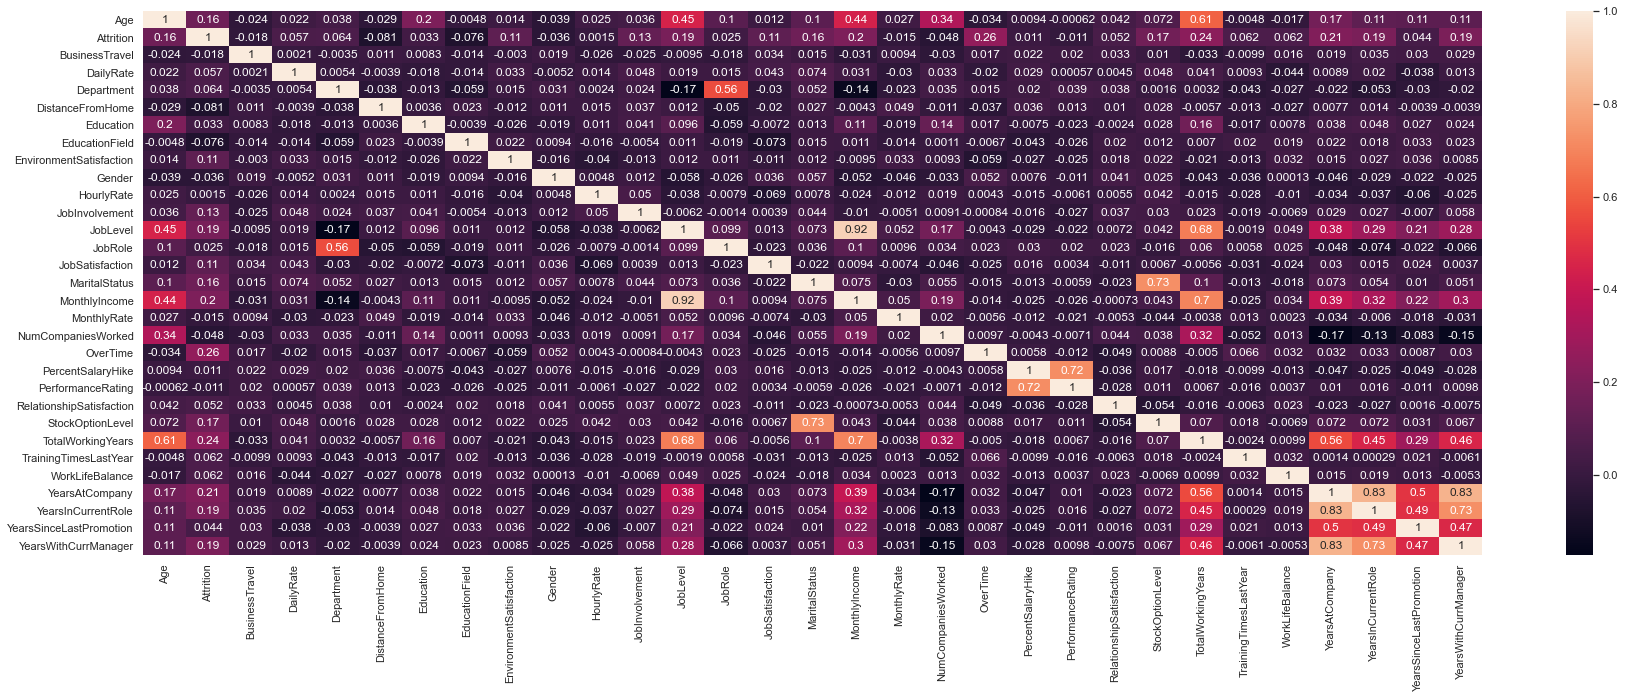

In [41]:
#checking correlation
plt.figure(figsize=(30,10))
sns.heatmap(df_new.corr(),annot=True)

In [42]:
X=df_new.drop("Attrition",axis=1)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.000000,1102,0,0.693147,2,0,2,0,94,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0.693147,279,1,2.197225,1,0,3,1,61,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,0.000000,1373,1,1.098612,2,1,4,1,92,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,0.693147,1392,1,1.386294,4,0,4,0,56,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,0.000000,591,1,1.098612,1,2,1,1,40,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.693147,884,1,3.178054,2,2,3,1,41,...,1.386294,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,0.000000,613,1,1.945910,1,2,4,1,42,...,1.386294,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,0.000000,155,1,1.609438,3,0,2,1,87,...,1.609438,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,0.693147,1023,0,1.098612,3,2,4,1,63,...,1.386294,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [43]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.007192,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.000074,0.056652,0.063991,-0.077924,0.031373,-0.075437,0.103369,-0.029453,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,-0.024751,0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.017799,-0.004174,0.032981,...,0.026341,0.035986,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.015942,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,-0.057499,0.019395,0.041583,...,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,-0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.020004,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,-0.002687,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.007192,-0.075437,-0.017799,-0.015942,-0.057499,0.020004,-0.002687,1.000000,0.015744,-0.003881,...,-0.027071,0.022723,0.020179,-0.002329,0.014553,0.033896,0.003061,-0.007728,0.004327,-0.001829
EnvironmentSatisfaction,0.010146,0.103369,-0.004174,0.018355,0.019395,-0.016075,-0.027128,0.015744,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,-0.029453,0.032981,-0.011716,0.041583,-0.001851,-0.016547,-0.003881,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [44]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA(n_components=10)
x=pca.fit_transform(X)
x

array([[ 5.17409237e+03, -3.04833428e+02, -2.81685084e+01, ...,
        -4.05379226e-01,  1.12701326e+00,  8.81104387e-01],
       [ 1.06034958e+04,  5.08884741e+02,  3.96122967e+00, ...,
        -1.08417640e-01, -8.35085549e-01,  2.15411623e+00],
       [-1.19093469e+04, -5.46561106e+02, -2.53795685e+01, ...,
        -7.73489084e-01,  1.57467667e+00,  5.76451487e-01],
       ...,
       [-9.12926439e+03,  6.66685492e+02, -2.12044424e+01, ...,
         1.07417800e+00,  1.50759424e-01, -3.28887001e-02],
       [-1.06176182e+03, -2.15131534e+02,  2.86363549e+00, ...,
        -2.97813980e-01, -3.61545653e-01, -7.54325469e-02],
       [-4.07608179e+03,  1.85027651e+02, -1.61181360e+01, ...,
         4.54552523e-01,  9.98620411e-01, -2.37249700e-02]])

In [46]:
X=pd.DataFrame(x)
print(X)
y=df_new["Attrition"]
print(y)


                 0           1          2          3         4         5  \
0      5174.092365 -304.833428 -28.168508   4.020074 -1.630282 -0.548420   
1     10603.495800  508.884741   3.961230  12.645501 -1.145436 -0.829845   
2    -11909.346892 -546.561106 -25.379569   0.415412 -0.970584  2.646410   
3      8853.591116 -601.106812  10.027581  -3.710493 -1.321209 -0.483862   
4      2327.973359  211.088779  25.736862  -8.901757  0.456869  0.727924   
...            ...         ...        ...        ...       ...       ...   
1382  -2014.521968  -74.477338  24.968843   0.112507  0.318347  0.392298   
1383   7152.928941  180.814615  23.444203   2.918725  0.907670 -0.752368   
1384  -9129.264392  666.685492 -21.204442  -8.888801 -1.433665 -0.449755   
1385  -1061.761821 -215.131534   2.863635  12.725614  0.804680 -0.288240   
1386  -4076.081791  185.027651 -16.118136  -2.265184  0.396323  0.030580   

             6         7         8         9  
0     1.797665 -0.405379  1.127013  0.88

# trainnings datasets

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [48]:
models=[SVC(),SVC(kernel="poly"),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=45)

for i in models:
    print("*****************",i,"*******************")
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("AC:",accuracy_score(y_test,pred))
    print("score:",i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print("CR:",classification_report(y_test,pred))
    print("\n")

***************** SVC() *******************
AC: 0.8594771241830066
score: 0.8279370952821462
[[  0  43]
 [  0 263]]
CR:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.86      1.00      0.92       263

    accuracy                           0.86       306
   macro avg       0.43      0.50      0.46       306
weighted avg       0.74      0.86      0.79       306



***************** SVC(kernel='poly') *******************
AC: 0.8594771241830066
score: 0.8279370952821462
[[  0  43]
 [  0 263]]
CR:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.86      1.00      0.92       263

    accuracy                           0.86       306
   macro avg       0.43      0.50      0.46       306
weighted avg       0.74      0.86      0.79       306



***************** DecisionTreeClassifier() *******************
AC: 0.7810457516339869
sco

In [50]:
max_ac=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.23,random_state=r)
    s= SVC() 
    s.fit(x_train,y_train)
    preds=s.predict(x_test)
    AC=accuracy_score(y_test,preds)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max accuracy score corresponding to",final_AC,"is",max_ac) 
print("RMSE:",classification_report(y_test,preds))

max accuracy score corresponding to 48 is 0.89375
RMSE:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.85      1.00      0.92       273

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



In [51]:
max_ac=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.23,random_state=r)
    gs= GaussianNB()
    gs.fit(x_train,y_train)
    pred=gs.predict(x_test)
    AC=accuracy_score(y_test,pred)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max ac score corresponding to",final_AC,"is",max_ac) 
print(confusion_matrix(y_test,pred))
print("RMSE:",classification_report(y_test,pred))

max ac score corresponding to 180 is 0.9
[[  5  42]
 [  2 271]]
RMSE:               precision    recall  f1-score   support

           0       0.71      0.11      0.19        47
           1       0.87      0.99      0.92       273

    accuracy                           0.86       320
   macro avg       0.79      0.55      0.56       320
weighted avg       0.84      0.86      0.82       320



In [52]:
max_ac=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.23,random_state=r)
    gbs= GradientBoostingClassifier()
    gbs.fit(x_train,y_train)
    predgs=gbs.predict(x_test)
    AC=accuracy_score(y_test,predgs)
    if AC>max_ac:
        max_ac=AC
        final_AC=r
print("max ac score corresponding to",final_AC,"is",max_ac) 
print("RMSE:",classification_report(y_test,predgs))

max ac score corresponding to 106 is 0.89375
RMSE:               precision    recall  f1-score   support

           0       0.47      0.17      0.25        47
           1       0.87      0.97      0.92       273

    accuracy                           0.85       320
   macro avg       0.67      0.57      0.58       320
weighted avg       0.81      0.85      0.82       320



In [53]:
cross=cross_val_score(gs,X,y,cv=6)
print(cross.mean())
print(cross)

0.8449986316365625
[0.83189655 0.83982684 0.83549784 0.84848485 0.85714286 0.85714286]


In [54]:
cross=cross_val_score(s,X,y,cv=6)
print(cross.mean())
print(cross)

0.8348976215355526
[0.83189655 0.83549784 0.83549784 0.83549784 0.83549784 0.83549784]


In [56]:
#savieing the best model
import joblib

joblib.dump(gs,"HR_employee_attrition.pkl")

['HR_employee_attrition.pkl']